# Исследование данных о продаже компьютерных игр
# Цель исследования
Выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
# Входные данные 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года


## Открытие и изучение файла с данными

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st

try: 
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')  

In [16]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных
* Замена названий столбцов (приведение к нижнему регистру);
* Обработка пропусков при необходимости;
* Преобразование данных в нужные типы;
* подсчет суммарных продаж во всех регионах и запись их в отдельный столбец.

### Замена названий столбцов

In [18]:
data.columns = data.columns.str.lower()

### Обработка пропусков

In [19]:
data.duplicated().sum() #поиск реальных дубликатов

0

In [20]:
data[pd.isna(data['genre'])] #вывод пропусков в столбе genre

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [21]:
data = data.dropna(subset = ['genre']) # удаление строк с пропуском в столбце genre и name
data = data.dropna(subset = ['year_of_release']) # удаление строк с пропуском в столбце year_of_release

In [22]:
#data['year_of_release'] = data['year_of_release'].fillna(0) # замена пропусков в столбце year_of_release на 0

In [23]:
#data[data['year_of_release'] == 0]['year_of_release'].count()

In [24]:
data = data.dropna(subset = ['year_of_release'])


In [25]:
data['critic_score'].unique() # вывод уникальных значений в столбце critic_score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [26]:
data['critic_score'] = data['critic_score'].fillna(0) # замена пропусков в столбце critic_score на 0

In [27]:
data['user_score'].unique() # вывод уникальных значений в столбце user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [28]:
data[data['user_score'] == 'tbd']['user_score'].count() # подсчет количества значений tbd в столбце user_score. 
#Вероятно они носят технический характер для дальнейшего анализа приравняем их к пропускам

2376

In [29]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].fillna(-1) # замена tbd на -1

In [30]:
data['rating'].unique() # вывод уникальных значений в столбце rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
data['rating'] = data['rating'].fillna('With_out_rating') # замена пропусков в столбце critic_score на фразу 'With_out_rating'

In [32]:
data['rating'].unique() # вывод уникальных значений в столбце rating

array(['E', 'With_out_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Вывод:** 
* Явные пропуски не выялены. 
* Выявлены пропуски в столбцах name и genre для двух игр, так как для этих игр присутствуют пропуски и в других столбцах, а уровни продаж минимальны их можно удалить без вреда для дальнейшего исследования.
* Удалены строки с пропусками в year_of_release.
* Пропуски в столбце critic_score заменены на 0, так как при стобальной системе оценивания оценка 0 крайнемаловероятна, а на дальнейшее исследование не повлияет (или позволит учесть при анализе)
* Пропуски в столбце user_score заменена на -1, чтобы отличить от реальных оценок 0. Так же произведена замена оценки 'tbd', которая вероятно иммет технический характер и фактически является пропуском. Так же заменена на -1.

В целом пропуски в данных вероятно связаны с тем, что игра еще не вышла на рынок на момент сбора данных.

###  Преобразование данных

In [34]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [35]:
data['critic_score'] = data['critic_score'].astype('int')

In [36]:
data['user_score'] = data['user_score'].astype('float')

In [37]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**Вывод:** 
* Столбец year_of_release преобразован в int, для дальнейшего анализа данного типа достаточно, так как анализ будет производиться только по годам без привязки к месяцам и дням
* Столбец critic_score преобразован в int так как стобальная система оценивания не подрозумевает дробные оценки и данного типа достоточно
* Столбец user_score преобразован в float, так как система оценивания десятибальная с дроббными оценками и мы заменяли пропуски значением -1.

### Подсчет суммарных продаж во всех регионах и запись их в отдельный столбец.

In [39]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,-1.0,With_out_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,-1.0,With_out_rating,31.38


## Исследовательский анализ данных

### Анализ распределения количества игр по годам

Text(0.5, 1.0, 'Расределение кол-ва игр по годам')

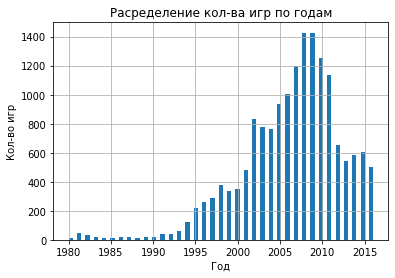

In [73]:
ax = data[data['year_of_release'] > 0]['year_of_release'].plot(kind='hist', bins=73, grid=True)
ax.set_xlabel('Год')
ax.set_ylabel('Кол-во игр')
ax.set_title('Расределение кол-ва игр по годам')

**Вывод:**
Бурный рост количества игр наблюдается в 2000-х, до этого периода игровая индустрия находилась в зачаточном состоянии.
Пик по количеству игр наблюдается в 2008 и 2009 годах и далее следует спад, вероятно связанный с перенасыщением рынка и появлением новой платформы в лице смартфонов. Мобильный гейминг начал отнимать ощутимую часть геймеров у традиционных платформ.

### Анализ распределения продаж по платформам 

In [45]:
data_with_year = data[data['year_of_release'] > 0]


Text(-3.825000000000003, 0.5, 'Платформа')

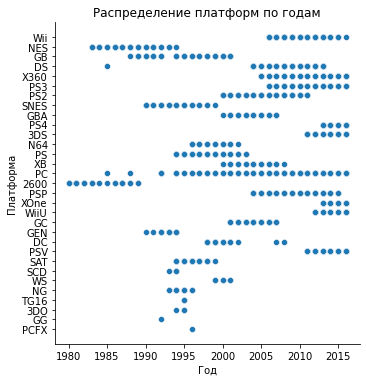

In [46]:
from matplotlib import pyplot as plt
sns.relplot(data = data_with_year
            ,y = 'platform'
            ,x = 'year_of_release'        
            )
plt.title('Распределение платформ по годам')
plt.xlabel('Год')
plt.ylabel('Платформа')


**Вывод:**
По графику видно, что в среднем платформы поддерживаются 5-10 лет, за исключением платформы PC которая даже при переходе на качественно новый уровень производительности считается единой платформой

### Проведения анализа за актуальный период

На основании пунктов 3.1. и 3.2 актальным периодом примим период с 2012 года

####  Определение платформ лидирующих по количеству продаж,  определение динамики продаж за актуальный период

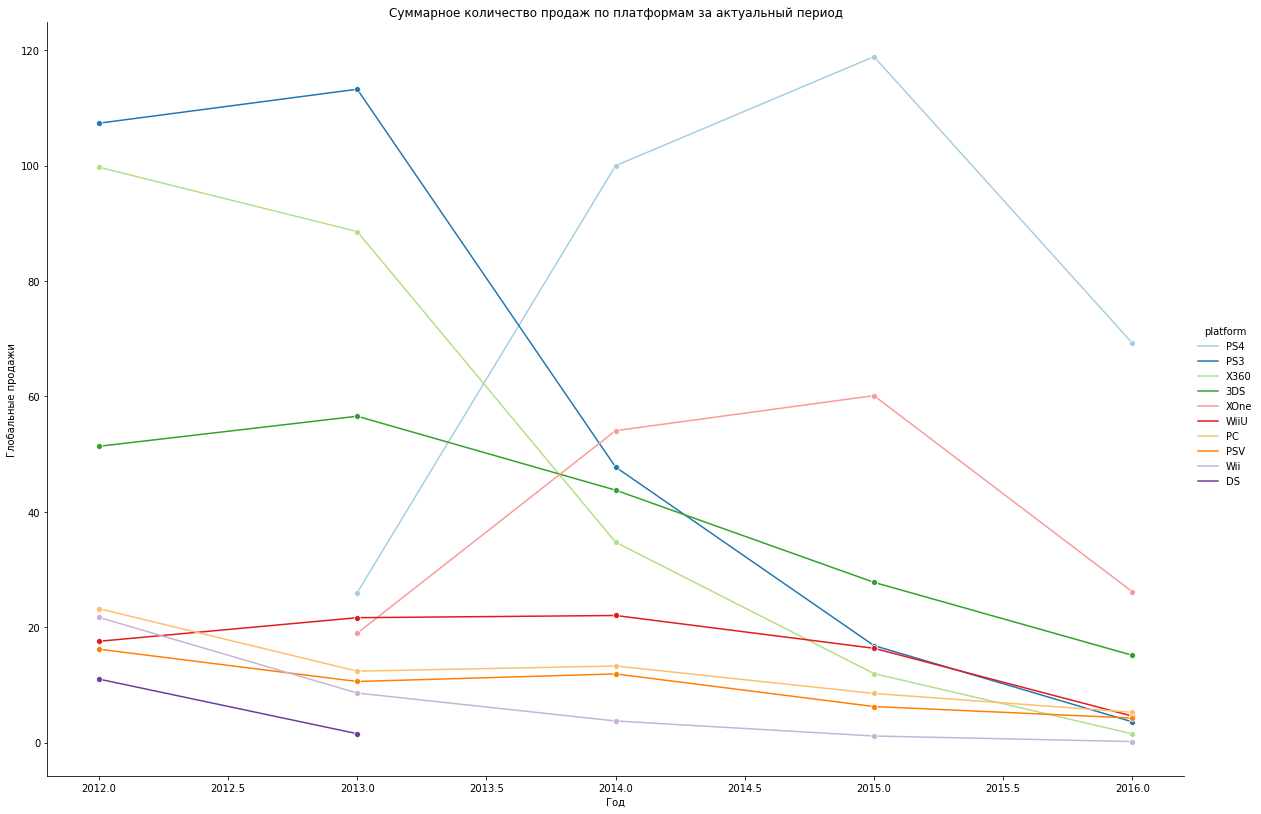

In [48]:
top=10
act_per = data[data['year_of_release'] >= 2012]
game_top_sale_act_per = act_per.pivot_table(
    index=['year_of_release','platform'],
    values='sum_sales', 
    aggfunc='sum', 
    fill_value=0
)
game_top_sale_act_per.reset_index(inplace=True)

platform_top_sale_act_per = game_top_sale_act_per.groupby(['platform']) \
.agg(sales=('sum_sales', 'sum')) \
.sort_values(by='sales', ascending=False) \
.head(top).index.tolist()


sns.relplot(
    x='year_of_release', 
    y='sum_sales', 
    hue='platform', 
    kind="line", 
    marker='o', 
    hue_order= platform_top_sale_act_per,
    palette='Paired', 
    data=game_top_sale_act_per.query('platform in @platform_top_sale_act_per'), 
    height=11, 
    aspect=1.5  
)
plt.title('Суммарное количество продаж по платформам за актуальный период')
plt.xlabel('Год')
plt.ylabel('Глобальные продажи')
plt.show()

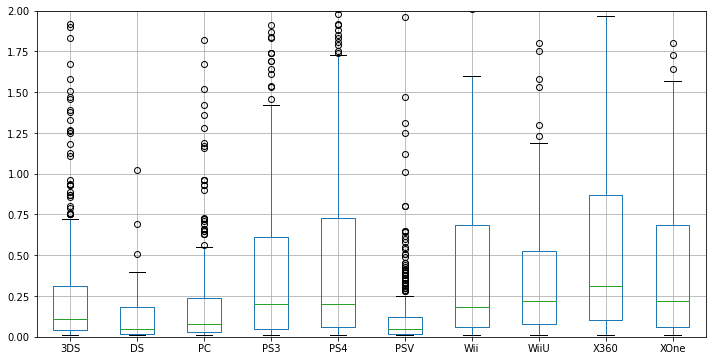

In [49]:
fig,ax = plt.subplots(figsize=(12,6))
act_per.query('platform == @platform_top_sale_act_per').pivot_table(values='sum_sales', index=['name'],
                                                 columns='platform').boxplot(ax=ax, grid=True)


ax.set_ylim(0,2)
plt.show()

**Вывод:** Так как в данных отражен не полный 2016 год (не учтены рожденственские продажи, которые могут оказать значительное влияние), то 2016 год можно не учитывать. На графике отмечены 10 лидирующих платформ за актуальный период с 2012 года, из них рост показали только PS4 и XOne, что не удевительно так как они обе вышли в 2013 году.  

####  Определение влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков

Для примера возьмем платформу с наибольшим количеством продаж в конце актуального периода PS3.

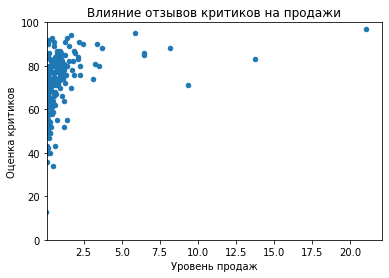

In [53]:
fnl_act_per = act_per.query('platform == @platform_top_sale_act_per & critic_score !=0 & user_score !=-1')
ax = fnl_act_per.query('platform == "PS3"')\
.pivot_table(index=['name'], 
             values=['critic_score', 'user_score', 'sum_sales'],
             aggfunc='sum') \
.plot(x='sum_sales',
      y='critic_score',
      kind='scatter')
ax.set_xlim(0.1)
ax.set_ylim(0,100)
ax.set_title('Влияние отзывов критиков на продажи')
plt.xlabel('Уровень продаж')
plt.ylabel('Оценка критиков')
plt.show()

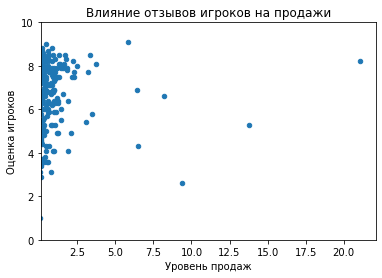

In [54]:
ax = fnl_act_per.query('platform == "PS3" & critic_score !=0 & user_score !=-1')\
.pivot_table(index=['name'], 
             values=['critic_score', 'user_score', 'sum_sales'],
             aggfunc='sum') \
.plot(x='sum_sales',
      y='user_score',
      kind='scatter')

ax.set_title('Влияние отзывов игроков на продажи')
ax.set_xlim(0.1)
ax.set_ylim(0,10)
plt.xlabel('Уровень продаж')
plt.ylabel('Оценка игроков')
plt.show()

In [55]:
fnl_act_per.pivot_table(values='sum_sales', 
                        index=['name'],
                        columns='platform')\
.describe()\
.round(3)

platform,3DS,DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
count,100.000,1.00,197.000,212.000,249.000,106.000,5.000,89.000,171.000,165.000
mean,0.795,1.02,0.288,0.977,0.981,0.254,2.646,0.742,1.058,0.789
std,1.496,NaN,0.540,2.052,1.646,0.272,2.613,1.215,2.038,1.041
min,0.010,1.02,0.010,0.010,0.010,0.010,0.140,0.010,0.010,0.010
25%,0.150,1.02,0.040,0.200,0.080,0.090,0.680,0.120,0.180,0.120
50%,0.325,1.02,0.120,0.440,0.300,0.170,2.520,0.370,0.480,0.340
75%,0.770,1.02,0.290,0.960,1.100,0.328,3.130,0.730,1.090,1.160
max,9.900,1.02,5.140,21.050,12.620,1.470,6.760,7.090,16.270,5.470


**Вывод:** На примере лидера по количеству продаж PS3 видно, что отзывы критиков оказывают значительно большее влияние на количество продаж чем отзывы игроков.

In [56]:
top_3_platform_sale_act_per = ['PS4', 'PSV', '3DS']
for i in top_3_platform_sale_act_per:
    stat=fnl_act_per.query('platform == @i')\
    .pivot_table(index='name',
                 values=['user_score','critic_score', 'sum_sales'], 
                 columns='platform')\
    .corr()\
    .round(2)
    stat = stat.loc[:, 'sum_sales']
    print(stat)

platform                PS4
             platform      
critic_score PS4       0.41
sum_sales    PS4       1.00
user_score   PS4      -0.03
platform                PSV
             platform      
critic_score PSV       0.09
sum_sales    PSV       1.00
user_score   PSV       0.01
platform                3DS
             platform      
critic_score 3DS       0.31
sum_sales    3DS       1.00
user_score   3DS       0.20


**Вывод:** Результаты у трех следующих по количеству платформ аналогичные, оценки критиков оказывают большее влияние на продажи чем оченки игроков.

In [57]:
genre_act_per = fnl_act_per.pivot_table(index='genre', 
                                        values='sum_sales',
                            aggfunc=['count', 'sum','mean'])
genre_act_per

,count,sum,mean
,sum_sales,sum_sales,sum_sales
genre,,,
Action,432,329.84,0.763519
Adventure,58,11.70,0.201724
Fighting,64,26.28,0.410625
Misc,56,37.91,0.676964
Platform,58,49.39,0.851552
Puzzle,9,3.14,0.348889
Racing,79,41.56,0.526076
Role-Playing,160,91.65,0.572812


**Вывод:** Самый популярный жанр по количеству игр и как следствие итоговым продажам предсказуемо Action, но максимальная средняя прибыль от одной игры у жанра Shooter

## Портрет пользователя отдельно для каждого региона

###  Определение жанровых предпочтений в разных регионах

<AxesSubplot:title={'center':'Распределение продаж по жанрам в Северной Америке'}, xlabel='genre'>

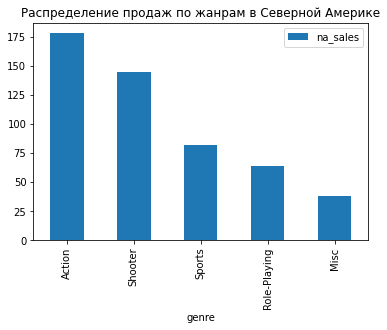

In [58]:
act_per.groupby(by='genre')\
.agg({'na_sales':'sum'})\
.sort_values(by='na_sales', ascending=False)\
.head(5)\
.plot(kind='bar', title = 'Распределение продаж по жанрам в Северной Америке')

<AxesSubplot:title={'center':'Распределение продаж по жанрам в Европе'}, xlabel='genre'>

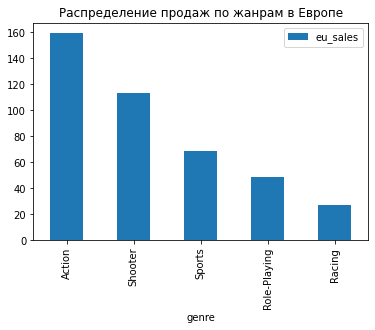

In [61]:
act_per.groupby(by='genre')\
.agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales', ascending=False)\
.head(5)\
.plot(kind='bar',title = 'Распределение продаж по жанрам в Европе')

<AxesSubplot:title={'center':'Распределение продаж по жанрам в Японии'}, xlabel='genre'>

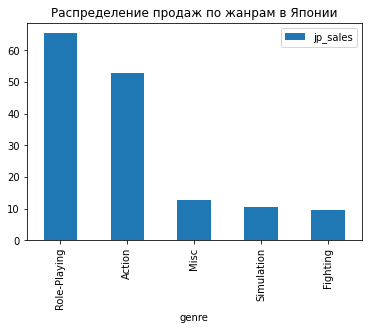

In [62]:
act_per.groupby(by='genre')\
.agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales', ascending=False)\
.head(5)\
.plot(kind='bar',title = 'Распределение продаж по жанрам в Японии')

**Вывод:** Для Европы и Северной Америке распределение по жанрам совпадает на 1 месте Action, далее по убыванию Sports, Shooter, Racing, Misc. Но для Япониии сор значительным перевесом лидирует Role-playing и Action, остальные жанры имеют значительно меньшие продажи.

###  Определение наиболее популярных платформ для разных регионов

<AxesSubplot:title={'center':'Распределение продаж по платформам в Северной Америке'}, xlabel='platform'>

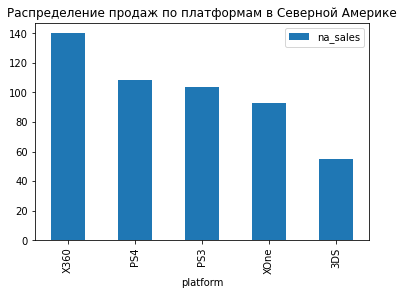

In [63]:
act_per.groupby(by='platform')\
.agg({'na_sales':'sum'})\
.sort_values(by='na_sales', ascending=False)\
.head(5)\
.plot(kind='bar',title = 'Распределение продаж по платформам в Северной Америке')

<AxesSubplot:title={'center':'Распределение продаж по платформам в Европе'}, xlabel='platform'>

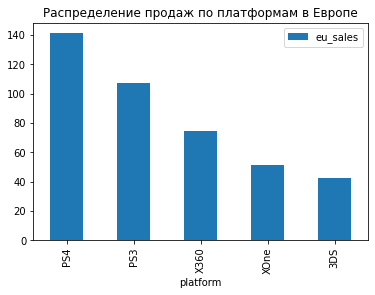

In [64]:
act_per.groupby(by='platform')\
.agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales', ascending=False)\
.head(5)\
.plot(kind='bar',title = 'Распределение продаж по платформам в Европе')

<AxesSubplot:title={'center':'Распределение продаж по платформам в Японии'}, xlabel='platform'>

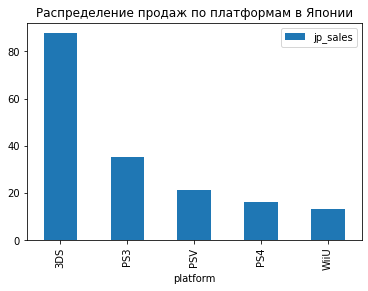

In [65]:
act_per.groupby(by='platform')\
.agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales', ascending=False)\
.head(5)\
.plot(kind='bar',title = 'Распределение продаж по платформам в Японии')

**Вывод:** Северной Америке наиболее популярные платформы PS2 и Х360, а для Европы PS2 и PS3.  В то же время для Японии значительно лидируют портативная консоль DS. 

###  Определения влияния рейтинга ESRB на продажи в отдельном регионе

<AxesSubplot:title={'center':'Распределение продаж игр по рейтингам в Северной Америке'}, xlabel='rating'>

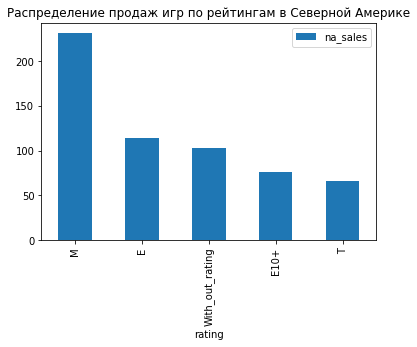

In [66]:
act_per.groupby(by='rating')\
.agg({'na_sales':'sum'})\
.sort_values(by='na_sales', ascending=False)\
.head(5)\
.plot(kind='bar',title = 'Распределение продаж игр по рейтингам в Северной Америке')

<AxesSubplot:title={'center':'Распределение продаж игр по рейтингам в Европе'}, xlabel='rating'>

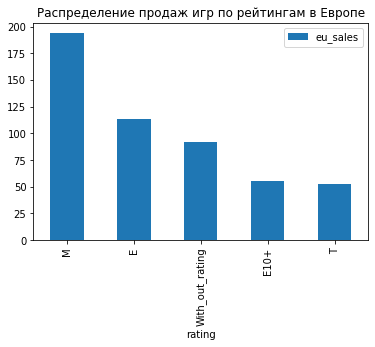

In [67]:
act_per.groupby(by='rating')\
.agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales', ascending=False)\
.head(5)\
.plot(kind='bar',title = 'Распределение продаж игр по рейтингам в Европе')

<AxesSubplot:title={'center':'Распределение продаж игр по рейтингам в Японии'}, xlabel='rating'>

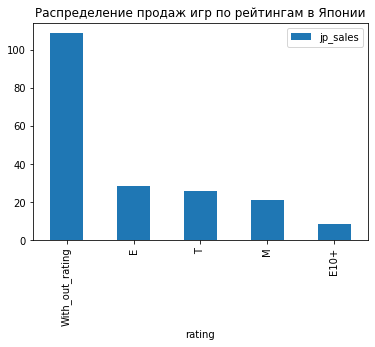

In [68]:
act_per.groupby(by='rating')\
.agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales', ascending=False)\
.head(5)\
.plot(kind='bar',title = 'Распределение продаж игр по рейтингам в Японии')

**Вывод:** В Северной Америке и Европе рейтинг оказывает значителльное влияние на продажи. Игры с рейтингом М имеют в 1,5 раза большие продажи чем игры с остальными рейтинграми. По Японии сложно сделать вывод, так как большая часть игр не имеют рейтинга (или данных не достаточно).

В итоге можно сделать вывод, что рынок Япониии значительно отличается от рынков Северной Америке и Европы. В Япониии предпочитают портативные консоли (2 из 5 наибольее популярных платформ, являются портативными консолями) с Role-Playing и Action играми, тогда как в Северной Америки и Европе предпочитают стационарные платформы с Action и Shooter играми.

## Проверка гипотез

###  Проверьте гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Определяем гипотезы:
* H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* H1: средний пользовательский рейтинг платформ Xbox One и PC различается

Так как задача стоит в сравниии средних значений двух выборок данных, то определения истинности гипотезы будем производить по t-критерию Стьюдента c помощью функции st.ttest_ind пакета scipy.stats. st.ttest_ind - вычисляет T-тест для средних двух независимых выборок.

In [ ]:
alpha = 0.05
xone = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

**Вывод:** Нулевая гипотеза предпологает, что средний пользовательский рейтинг платформ одинаковый, следовательно альтернативная гипотеза предполагает обратную ситуацию, что средний пользовательский рейтинг платформ на платформах различаются. Так как p-значения значительно меньше 5%, то отвергаем нулевую гипотезу и делаем вывод, что средний пользовательский рейтинг платформ Xbox One и PC различается.

###  Проверьте гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные

Определяем гипотезы:
* H0: Средние пользовательские рейтинги жанров Action и Sports разные
* H1: Средние пользовательские рейтинги жанров Action и Sports одинаковый

In [ ]:
action_genre = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
sports_genre = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']

results = st.ttest_ind(action_genre, sports_genre)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


**Вывод:** Нулевая гипотеза предпологает, что средний пользовательский рейтинг жанров одинаковый, следовательно альтернативная гипотеза предполагает обратную ситуацию, что средний пользовательский рейтинг жанров различаются. Так как p-значения значительно больше 5%, то нулевую гипотезу не получилось отвергнуть и можно сделать вывод, что средний пользовательский рейтинг жанров различается.

## Общий вывод

Жизненный цикл платформы (за исключением PC) составляет 4-5 лет, так как именно с такой периодичностью ведущие производители выпускают новые поколения консолей. За этот период происходит резкий взлет продаж с плавным падением с выходом каждого нового поколения.
В этой связи делаем вывод, что производителям необходимо отслеживать количество продаж и выпускать новое поколение при где-то через год после пика продаж предыдущего поколения.

Так же необходимо учитывать специфику рынков продаж, если Европа и Северная Америка во много схожи, то Япония значительно отличается, как и выборе жанров, так и предпочитаемых платформах. В Япониии предпочитают портативные консоли (2 из 5 наибольее популярных платформ, являются портативными консолями) с Role-Playing и Action играми, тогда как в Северной Америки и Европе предпочитают стационарные платформы с Action и Shooter играми.

В свою очередь издателям игр надо учитывать рейтинг ESRB, так как он оказывает значительное влияние на продажи в Европе и Северной Америке. При этом рейтинг игроков оказывает куда меньшее влияние на продажи, чем рейтинги критиков.

В целом на рынке наблюдается устойчивый спад продаж игр на всех платформах, если ситуация не исправится за счет рождественских продаж декабря 2016 - января 2017 года, то наступает оптимальное время для анонса новых поколений консолей или улучшеных версии текущего поколения.

Так же на рынке наблюдается спад количества игр, вероятно это связано с появлением новой платформы в лице смартфона. Производителем и издателям игр следует обратить внимание на новое перспиктовное направление на рынке.
